# Revisiting pH and pCO2
This notebook looks into some newer pH and pCO2 datasets available from the OOI, in order to possibly update some of the orignal [Properties of Seawater](https://datalab.marine.rutgers.edu/explorations/chemistry/) Data Explorations developed in 2017.

*Revised by Sage Lichtenwalner, September 2021*

In [1]:
# Notebook Setup
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Setup default plot styles
import seaborn as sns
sns.set()

In [2]:
!pip install git+https://github.com/seagrinch/ooilab.git
import ooilab
ooilab.API_USERNAME = ''
ooilab.API_TOKEN = ''

  Cloning https://github.com/seagrinch/ooilab.git to /tmp/pip-req-build-z5e_5q8s
  Running command git clone -q https://github.com/seagrinch/ooilab.git /tmp/pip-req-build-z5e_5q8s


## pH and pCO2 Timeseries
Let's see if we can find a better dataset for the 2017 [Changes in pH and pCO2](http://explorations.localhost/chemistry/activity4.php?level=exploration) widget.  The existing widget uses data from the *Oregon Shelf Surface Mooring* (CE02SHSM) located in 80m of water, including pH from 7m and pCO2 from the surface.



In [3]:
# ooilab.request_data('CE02SHSM-RID26-06-PHSEND000','telemetered','phsen_abcdef_dcl_instrument',
#              '2020-07-01T00:00:00.000Z','2021-09-01T00:00:00.000Z')
# ooilab.request_data('CE02SHSM-SBD12-04-PCO2AA000','telemetered','pco2a_a_dcl_instrument_water',
#              '2020-07-01T00:00:00.000Z','2021-09-01T00:00:00.000Z')


In [4]:
url_ph = 'https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20210902T193436523Z-CE02SHSM-RID26-06-PHSEND000-telemetered-phsen_abcdef_dcl_instrument/catalog.html'
url_pco2 = 'https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20210902T193358456Z-CE02SHSM-SBD12-04-PCO2AA000-telemetered-pco2a_a_dcl_instrument_water/catalog.html'

In [5]:
# Load datasets
data_ph = ooilab.get_data(ooilab.get_filelist(url_ph))
data_pco2 = ooilab.get_data(ooilab.get_filelist(url_pco2))

# Remove outliers
data_ph['phsen_abcdef_ph_seawater'] = ooilab.clean_data(data_ph.phsen_abcdef_ph_seawater,sd=5)

In [6]:
# Average
data_ph_avg = data_ph['phsen_abcdef_ph_seawater'].resample(time='2H').mean()
data_pco2_avg = data_pco2['partial_pressure_co2_ssw'].resample(time='2H').mean()

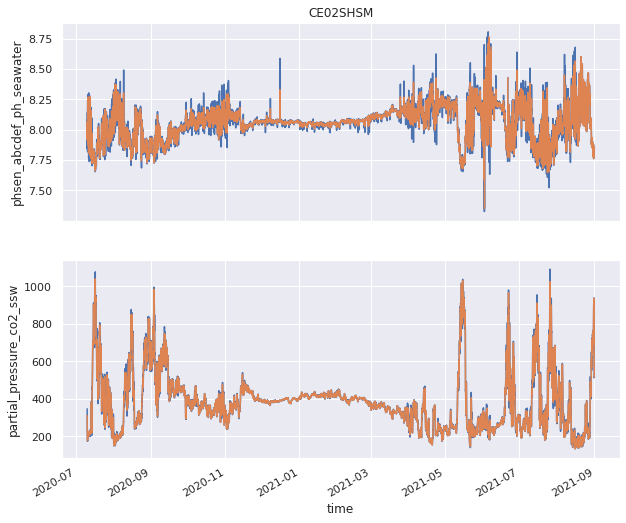

In [7]:
# Plot the data
fig,ax = plt.subplots(2,sharex=True,figsize=(10,8));
data_ph['phsen_abcdef_ph_seawater'].plot(ax=ax[0]);
data_pco2['partial_pressure_co2_ssw'].plot(ax=ax[1]);
data_ph_avg.plot(ax=ax[0]);
data_pco2_avg.plot(ax=ax[1]);

ax[0].set_title('CE02SHSM');
ax[0].set_xlabel('');
fig.savefig('CE02_timeseries.png');

In [8]:
# Merge the averaged data
data = xr.merge([data_ph_avg,data_pco2_avg],join='inner')

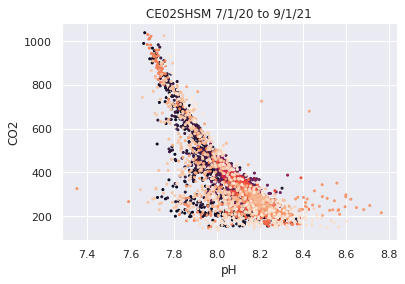

In [9]:
# Scatterplot
plt.scatter(data.phsen_abcdef_ph_seawater, data.partial_pressure_co2_ssw, s=4, c=data.time);
plt.xlabel('pH');
plt.ylabel('CO2');
plt.title('CE02SHSM 7/1/20 to 9/1/21');
plt.savefig('CE02_scatter.png');

In [10]:
# Export raw data
# data_ph['phsen_abcdef_ph_seawater'].to_dataframe().to_csv('data_ph.csv')
# data_pco2['partial_pressure_co2_ssw'].to_dataframe().to_csv('data_pco2.csv')

# Export averaged data
data.to_dataframe().to_csv('ce02.csv')

In the end, it doesn't look like this dataset is that different from the original one from 2015-2016.  The pH is a little more stable over the winter than the original dataset, though the variabilty and range during the rest of the year seems to be about the same.  The orignal pCO2 dataset was more stable over the winter, as is the new one.  The peaks seems to be clearer in the new dataset, but the same ranges.

## pH Datasets
Here we will try to find a new datset for the [Changes in pH with Depth](http://explorations.localhost/chemistry/activity3.php?level=application) widget.

The orginal used profiler data from 
* Oregon Offshore Cabled Shallow Profiler Mooring (CE04OSPS-SF01B-2B-PHSENA108) 
* Oregon Slope Base Shallow Profiler Mooring (RS01SBPS-SF01A-2D-PHSENA101)

The profiles were plotted as simple scatter plots, without connecting the profile lines.

In [11]:
# ooilab.request_data('RS01SBPS-SF01A-2D-PHSENA101','streamed','phsen_data_record',
#              '2019-01-01T00:00:00.000Z','2020-01-01T00:00:00.000Z')
# ooilab.request_data('CE04OSPS-SF01B-2B-PHSENA108','streamed','phsen_data_record',
#              '2019-01-01T00:00:00.000Z','2020-01-01T00:00:00.000Z')


In [12]:
# Jan-Feb 2019
# url_rs01 = 'https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20210901T184035010Z-RS01SBPS-SF01A-2D-PHSENA101-streamed-phsen_data_record/catalog.html'
# url_ce04 = 'https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20210901T184005891Z-CE04OSPS-SF01B-2B-PHSENA108-streamed-phsen_data_record/catalog.html'

# All of 2019
url_rs01 = 'https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20210914T164254538Z-RS01SBPS-SF01A-2D-PHSENA101-streamed-phsen_data_record/catalog.html'
url_ce04 = 'https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20210914T164307246Z-CE04OSPS-SF01B-2B-PHSENA108-streamed-phsen_data_record/catalog.html'

In [13]:
# Load datasets
data_rs01 = ooilab.get_data(ooilab.get_filelist(url_rs01), subset_list=['ph_seawater','depth'], load_increment=True)
data_ce04 = ooilab.get_data(ooilab.get_filelist(url_ce04),subset_list=['ph_seawater','depth'], load_increment=True)

In [14]:
# Clean datasets
# data_rs01['ph_seawater2'] = ooilab.clean_data(data_rs01['ph_seawater'],min=7.5,max=8.5)
# data_ce04['ph_seawater2'] = ooilab.clean_data(data_ce04['ph_seawater'],min=7.5,max=8.5)

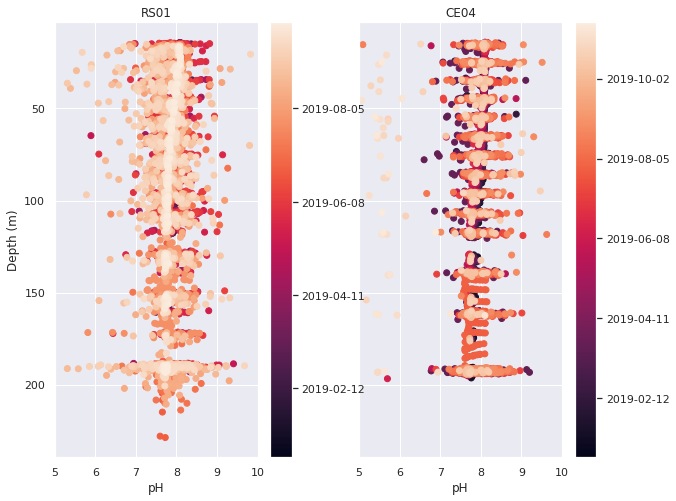

In [15]:
# Plot the data
fig, [ax1,ax2] = plt.subplots(1,2, sharey=True, sharex=True, figsize=(10,8))
sc1 = ax1.scatter(data_rs01.ph_seawater, data_rs01.depth, c=data_rs01.time);
sc2 = ax2.scatter(data_ce04.ph_seawater, data_ce04.depth, c=data_ce04.time);

cbar = fig.colorbar(sc1, ax=ax1, orientation='vertical')
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));
cbar2 = fig.colorbar(sc2, ax=ax2, orientation='vertical')
cbar2.ax.set_yticklabels(pd.to_datetime(cbar2.get_ticks()).strftime(date_format='%Y-%m-%d'));

ax1.set_xlim(5,10)

ax1.invert_yaxis();
ax1.set_xlabel('pH')
ax2.set_xlabel('pH')
ax1.set_ylabel('Depth (m)')
ax1.set_title('RS01')
ax2.set_title('CE04')
fig.savefig('RS01_CE04_profiles.png');

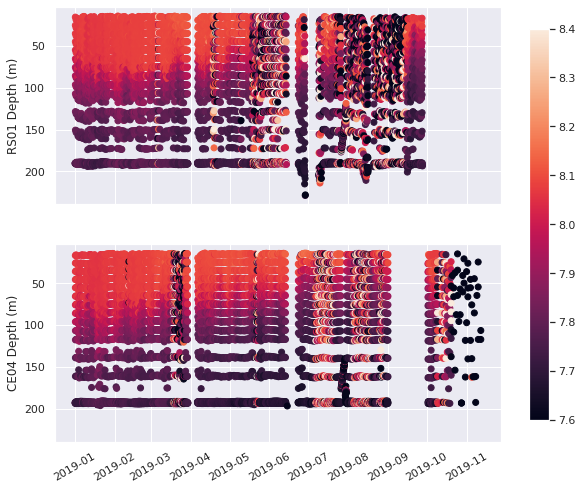

In [16]:
# Plot the data
fig, [ax1,ax2] = plt.subplots(2,1, sharey=True, sharex=True, figsize=(10,8))
sc1 = ax1.scatter(data_rs01.time, data_rs01.depth, c=data_rs01.ph_seawater, vmin=7.6, vmax=8.4);
sc2 = ax2.scatter(data_ce04.time, data_ce04.depth, c=data_ce04.ph_seawater, vmin=7.6, vmax=8.4);

cbar = fig.colorbar(sc1, ax=[ax1, ax2], orientation='vertical', shrink=0.9)

ax1.invert_yaxis();
ax2.tick_params(axis="x", rotation=30)
ax1.set_ylabel('RS01 Depth (m)')
ax2.set_ylabel('CE04 Depth (m)')
fig.savefig('RS01_CE04_profile_series.png');

In [17]:
# Export
data_rs01[['ph_seawater','depth']].to_dataframe().drop(['lon','lat','obs'],axis=1).to_csv('rs01_profiles.csv')
data_ce04[['ph_seawater','depth']].to_dataframe().drop(['lon','lat','obs'],axis=1).to_csv('ce04_profiles.csv')